In [1]:
# Auto Encoder 실습. 필요 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
# Data Load
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Data preprocessing

# data norm
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
# data flatten
print('flatten 전 shape : ', x_train.shape, x_test.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('flatten 후 shape : ', x_train.shape, x_test.shape)

flatten 전 shape :  (60000, 28, 28) (10000, 28, 28)
flatten 후 shape :  (60000, 784) (10000, 784)


In [10]:
# model
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)

In [11]:
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136

In [12]:
encoder = Model(inputs=input_img, outputs=encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
autoencoder.fit(x_train, x_train, epochs=100,
                batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
469/469 [==============================] - 7s 12ms/step - loss: 0.4023 - val_loss: 0.3365
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.3100 - val_loss: 0.2841
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.3021 - val_loss: 0.3064
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2812 - val_loss: 0.2753
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2839 - val_loss: 0.2716
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2628 - val_loss: 0.2676
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.2603 - val_loss: 0.2446
Epoch 8/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2650 - val_loss: 0.2733
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2433 - val_loss: 0.2765
Epoch 10/100
469/469 [==============================] - 6s 13ms/step - loss: 0.237

313/313 [==============================] - 1s 2ms/step


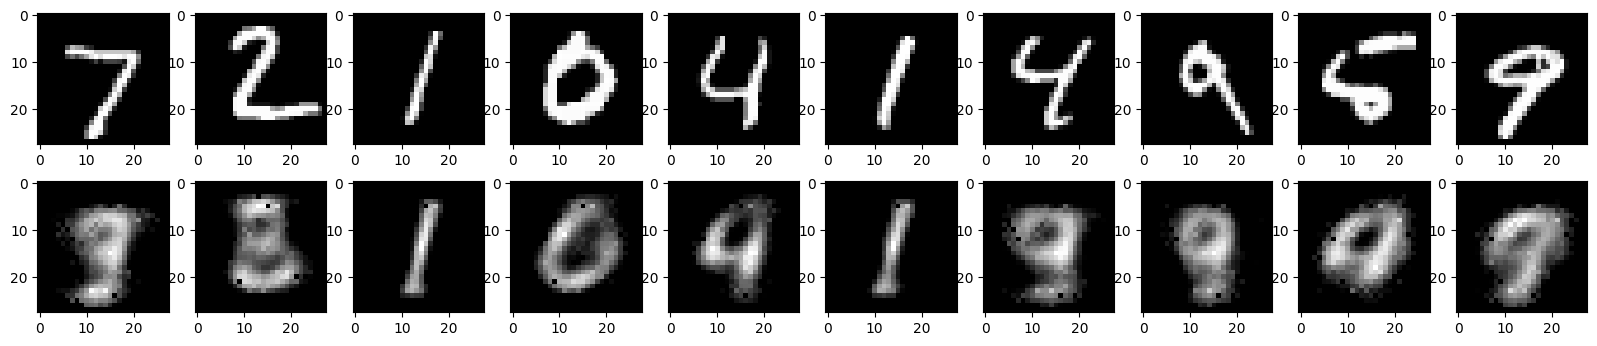

In [17]:
encoded_img = encoder.predict(x_test)
decoded_img = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()

plt.show()

In [18]:
# stable diffusion
!pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.7 MB/s eta 0:00:00


In [19]:
import time
import keras_cv
from tensorflow import keras


Using TensorFlow backend


In [20]:
stable_model = keras_cv.models.StableDiffusion()

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [21]:
images = stable_model.text_to_image('photograph of an astronaut')
images

198180272/198180272 [==============================] - 2s 0us/step


array([[[[ 32,  29,  50],
         [ 29,  24,  51],
         [ 34,  28,  57],
         ...,
         [ 36,  39,  68],
         [ 41,  44,  76],
         [ 37,  41,  63]],

        [[ 31,  27,  55],
         [ 29,  22,  53],
         [ 34,  28,  61],
         ...,
         [ 37,  36,  69],
         [ 35,  35,  67],
         [ 35,  35,  61]],

        [[ 35,  30,  59],
         [ 36,  29,  62],
         [ 36,  29,  64],
         ...,
         [ 47,  45,  80],
         [ 41,  38,  72],
         [ 38,  39,  66]],

        ...,

        [[179, 178, 154],
         [152, 147, 131],
         [ 87,  96,  82],
         ...,
         [ 34,  34,  67],
         [ 37,  37,  71],
         [ 36,  35,  62]],

        [[140, 128, 120],
         [103,  94,  89],
         [105, 110,  92],
         ...,
         [ 36,  33,  67],
         [ 33,  33,  66],
         [ 33,  35,  60]],

        [[136, 128, 119],
         [ 88,  83,  87],
         [126, 130, 109],
         ...,
         [ 36,  35,  67],
        

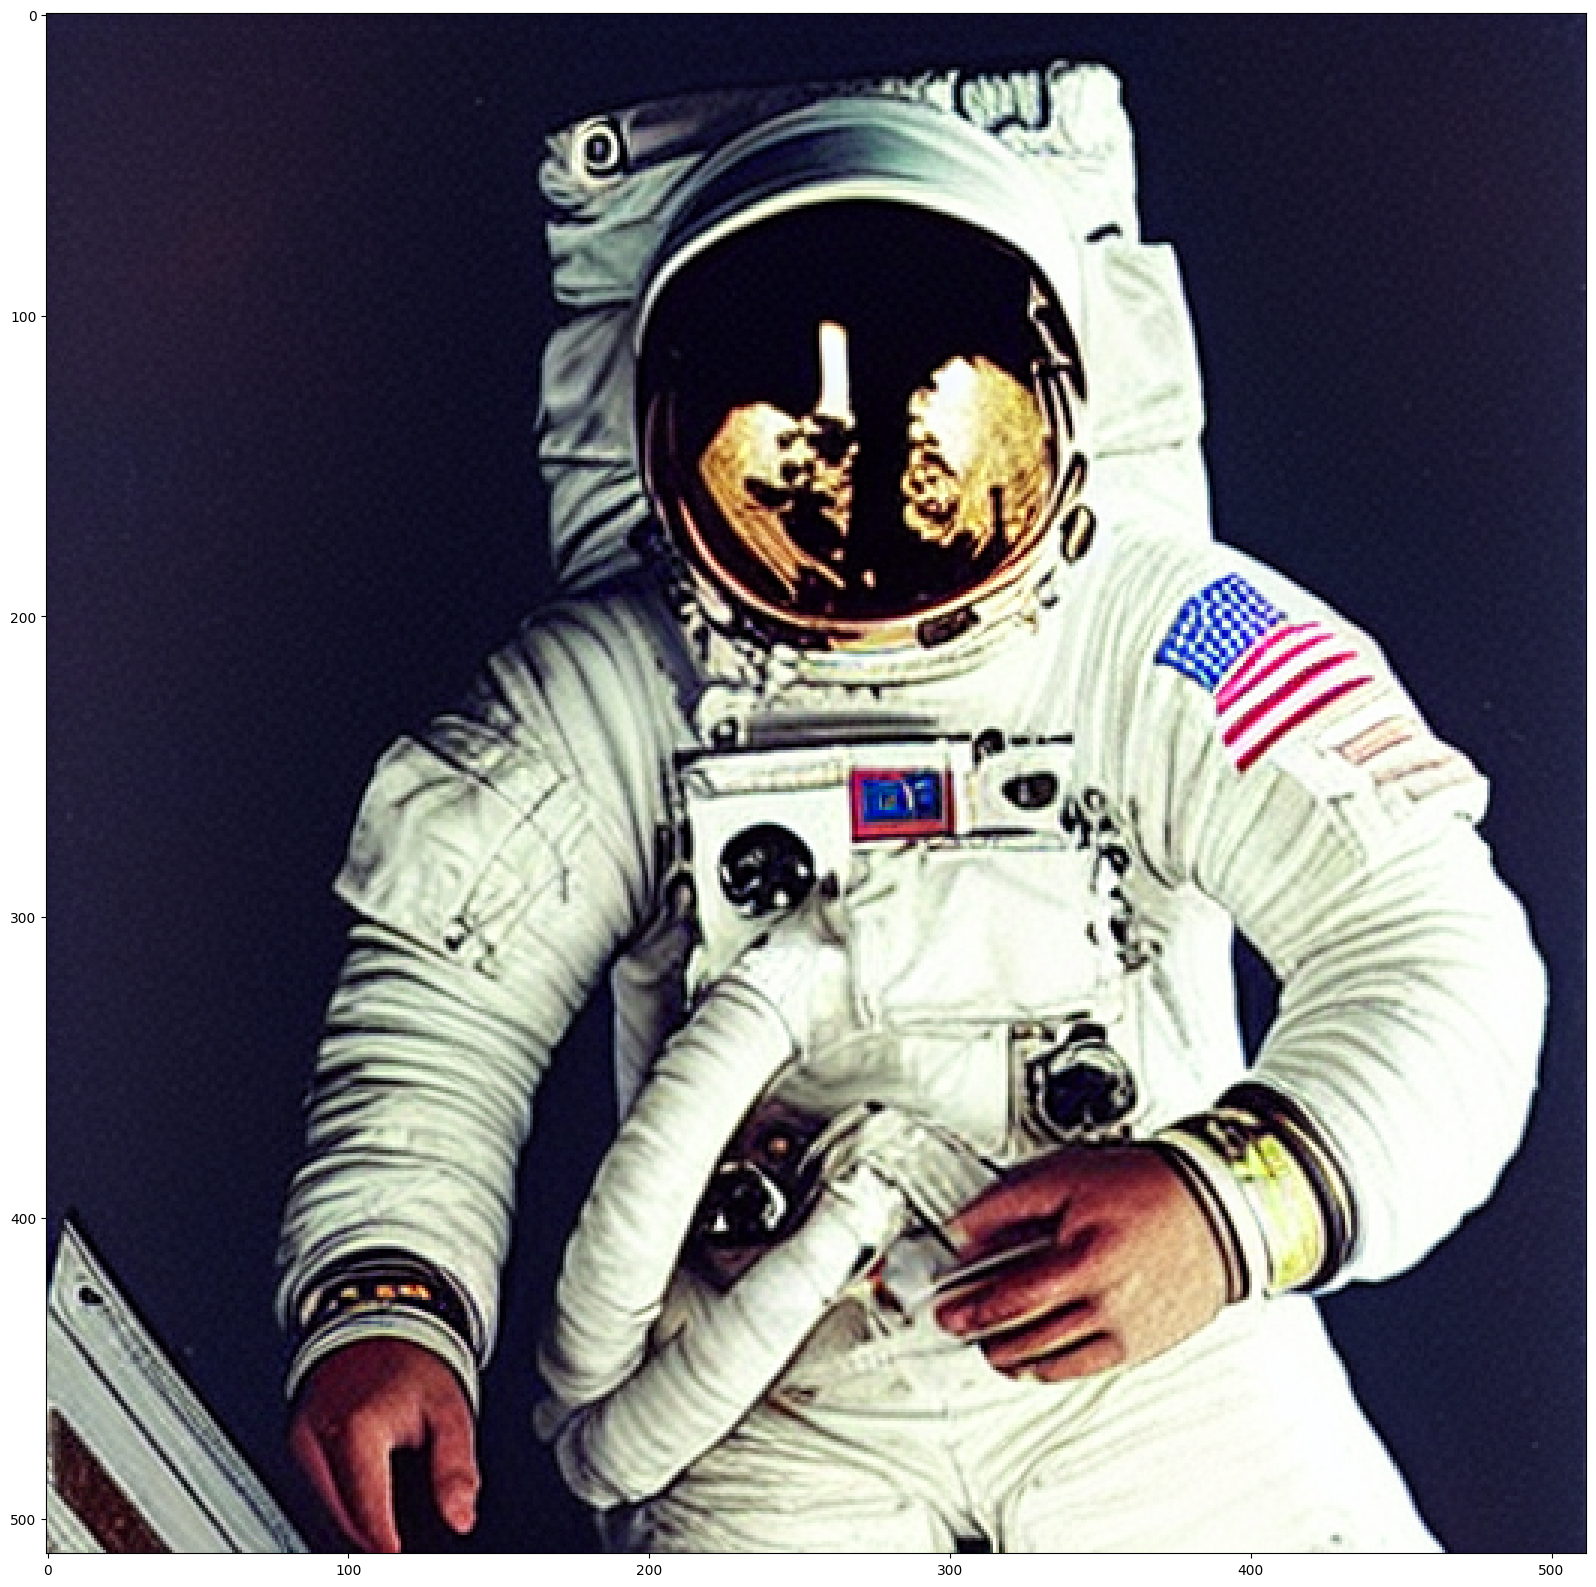

In [22]:
def plot_image(images):
    plt.figure(figsize=(20,20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])

plot_image(images)